Primeiros dados
   num-pregnant  glucose  diastolic  triceps-skin  insulin  body-mass  \
0             6      148         72            35        0       33.6   
1             1       85         66            29        0       26.6   
2             8      183         64             0        0       23.3   
3             1       89         66            23       94       28.1   
4             0      137         40            35      168       43.1   

   diabetes-pedigree  age  class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  
num-pregnant           int64
glucose                int64
diastolic              int64
triceps-skin           int64
insulin                int64
body-mass            float64
diabetes-pedigree    float64
age                    int64
class                  int64
dtype: object
Acuracia de treinamento da tree1: 0.778
Acuracia de validaca

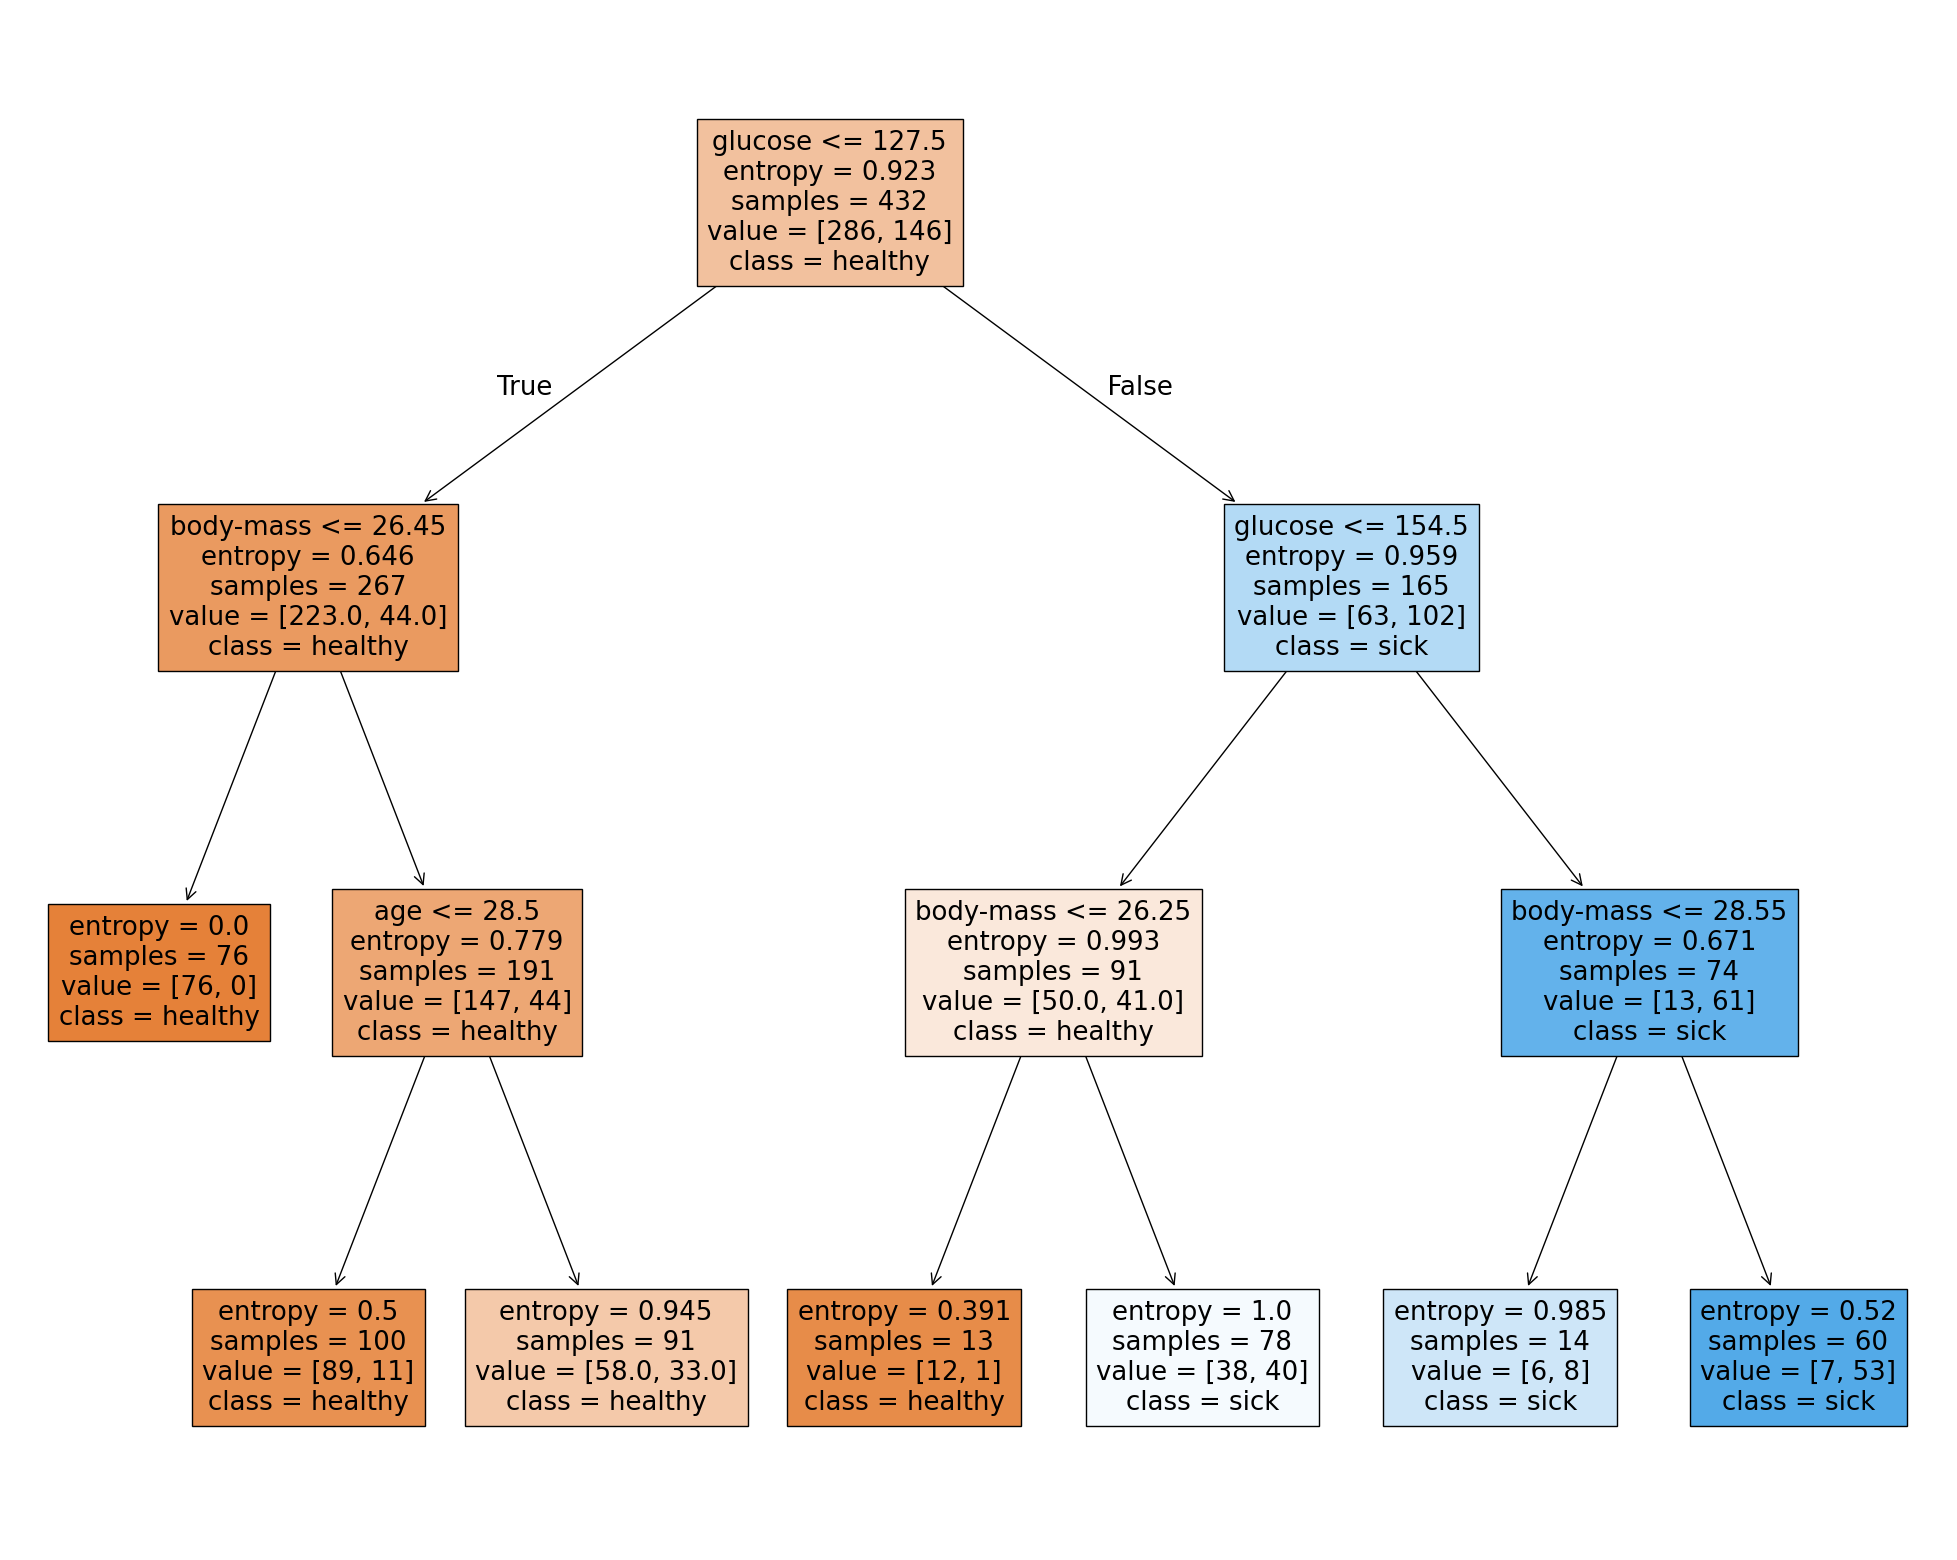

In [2]:
import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import dtreeviz
plt.rcParams['figure.figsize'] = [16, 10]

#Metodos de visualizado de arvore de decisao
#https://mljar.com/blog/visualize-decision-tree/

#definindo os nomes de cada coluna
feat_names = ['num-pregnant', 'glucose', 'diastolic', 'triceps-skin', 'insulin', 'body-mass', 'diabetes-pedigree', 'age', 'class']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning
dataset = pandas.read_csv("pima-indians-diabetes.csv", names=feat_names)

print("Primeiros dados")
print(dataset.head(5))

print(dataset.dtypes)

#divisao de dados atributos e classe
X = dataset.values[:, 0:-1] #caracteristicas
Y = dataset.values[:, -1] #classe

#Metodo para divisao dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

#criando diferentes arvores
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state = 10)

tree2 = DecisionTreeClassifier(random_state = 10)

tree1 = tree1.fit(X_train, y_train) #treinamento da tree1

tree2 = tree2.fit(X_train, y_train) #treinamento da tree2

#apresentando os desempenhos das arvores treinadas
print("Acuracia de treinamento da tree1: %0.3f" %  tree1.score(X_train, y_train))
print("Acuracia de validacao da tree1: %0.3f" %  tree1.score(X_valid, y_valid))

print("Acuracia de treinamento da tree2: %0.3f" %  tree2.score(X_train, y_train))
print("Acuracia de validacao da tree2: %0.3f" %  tree2.score(X_valid, y_valid))

print("Profundidade das arvores criadas:")
print(tree1.tree_.max_depth)
print(tree2.tree_.max_depth)

#apresentacao da arvore em texto
text_representation = tree.export_text(tree1,feature_names=feat_names[0:len(feat_names)-1])
print(text_representation)

#apresentacao usando o plot_tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree1,
                   feature_names=feat_names,
                   class_names=["healthy","sick"],
                   filled=True)
#para salvar a imagem
fig.savefig("decistion_tree.png")

#utilizando o graphiz
import graphviz
# DOT data
dot_data = tree.export_graphviz(tree1, out_file=None,
                                feature_names=feat_names[0:len(feat_names)-1],
                                class_names=["healthy","sick"],
                                filled=True)

# # Draw graph
# graph = graphviz.Source(dot_data, format="png")
# graph

# viz = dtreeviz.model(tree1, X_train, y_train,target_name='class',
#                 feature_names=feat_names,
#                 class_names=list(["healthy","sick"]))
# viz.view()